<a href="https://colab.research.google.com/github/tsega19/kf_solar-insights-analysis_0/blob/main/analysis_togo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explaroty Date Analysis

In [21]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [22]:
# import dataset
file_path = 'togo-dapaong_qc.csv'
data = pd.read_csv(file_path)

In [23]:
# Display dataset info
print("Dataset Overview")
print(data.info())
print("\nFirst 5 rows of the dataset")
print(data.head())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB       

In [24]:
# check for missing value
print("\nMissing Values")
print(data.isnull().sum())


Missing Values
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [25]:
# Data Quality Check: Negative values in GHI, DNI, and DHI
print("\nNegative Values Check")
for column in ['GHI', 'DNI', 'DHI']:
    print(f"{column}: {(data[column] < 0).sum()} negative values")


Negative Values Check
GHI: 257385 negative values
DNI: 0 negative values
DHI: 0 negative values


In [26]:
# Summary Statistics
print("\nSummary Statistics")
print(data.describe())


Summary Statistics
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

In [27]:
# Convert Timestamp to datetime and set as index
# Try to infer the format automatically, handling errors by coercing them to NaT (Not a Time)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# If you know the actual format of your 'Timestamp' column, replace 'infer_datetime_format=True' with format='%Y-%m-%d %H:%M:%S' for example
# data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

data.set_index('Timestamp', inplace=True)

# Check for and handle any NaT (Not a Time) values introduced due to errors
print("\nNumber of NaT values in index:", data.index.isnull().sum())
# If there are NaT values, you can drop them:
# data = data[data.index.notnull()]


Number of NaT values in index: 0


<Figure size 1000x600 with 0 Axes>

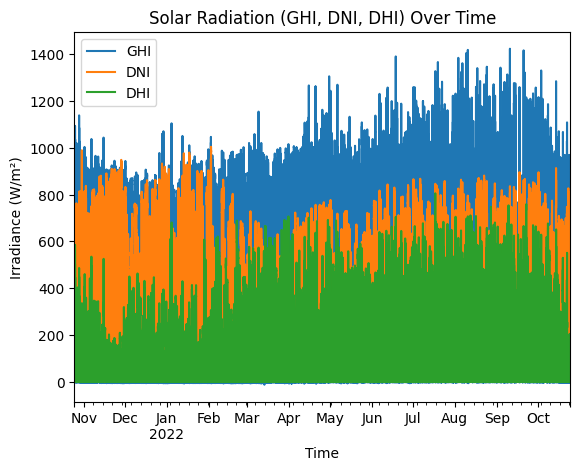

In [28]:
# plt each distribution of catagorical data
plt.figure(figsize=(10, 6))
data[['GHI', 'DNI', 'DHI']].plot()
plt.title("Solar Radiation (GHI, DNI, DHI) Over Time")
plt.ylabel("Irradiance (W/m²)")
plt.xlabel("Time")
plt.legend()
plt.show()
#

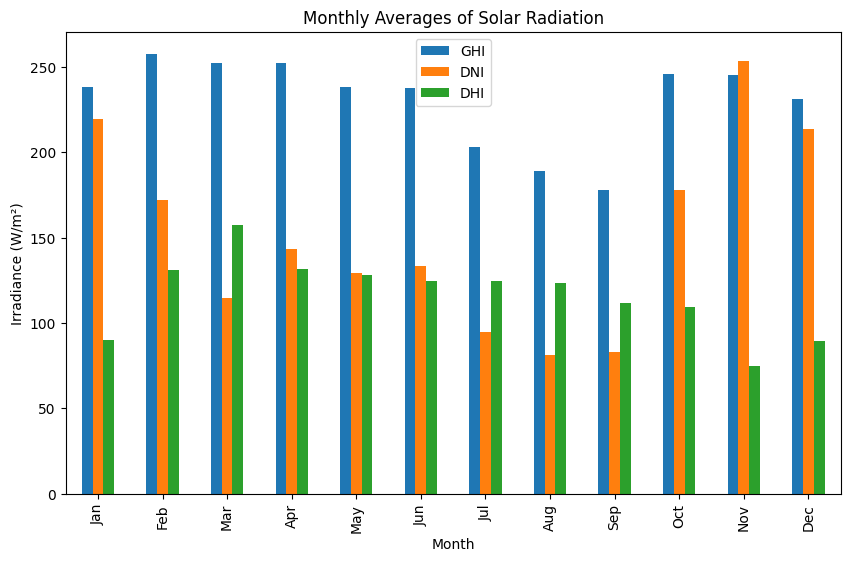

In [29]:
# Monthly Averages Analysis
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 6))
plt.title("Monthly Averages of Solar Radiation")
plt.ylabel("Irradiance (W/m²)")
plt.xlabel("Month")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


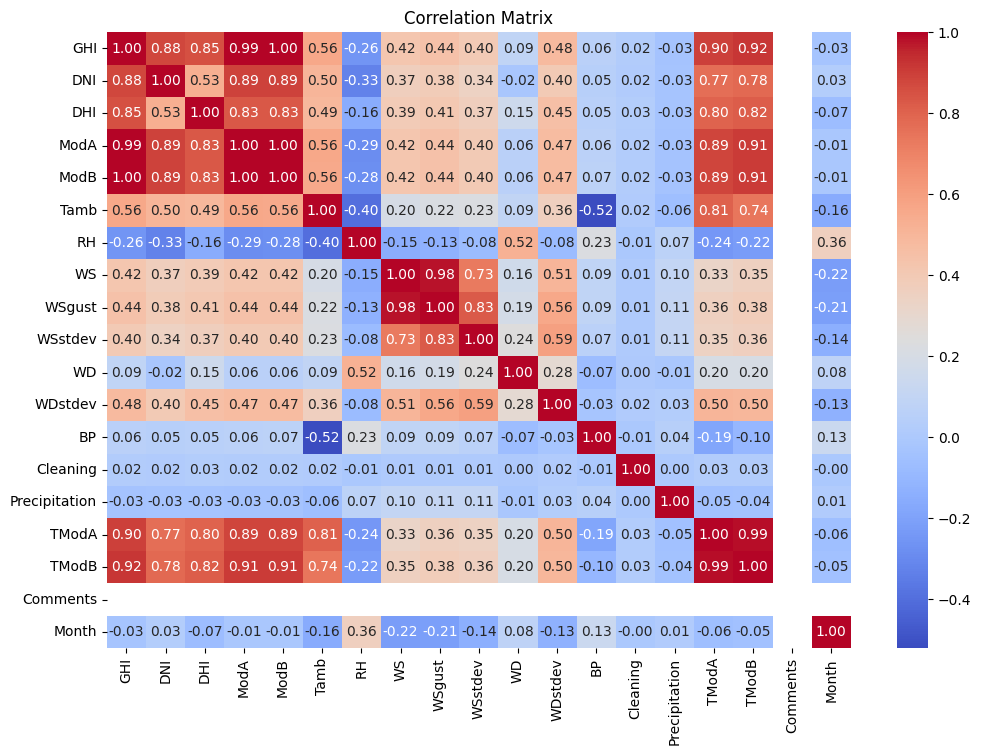

In [30]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

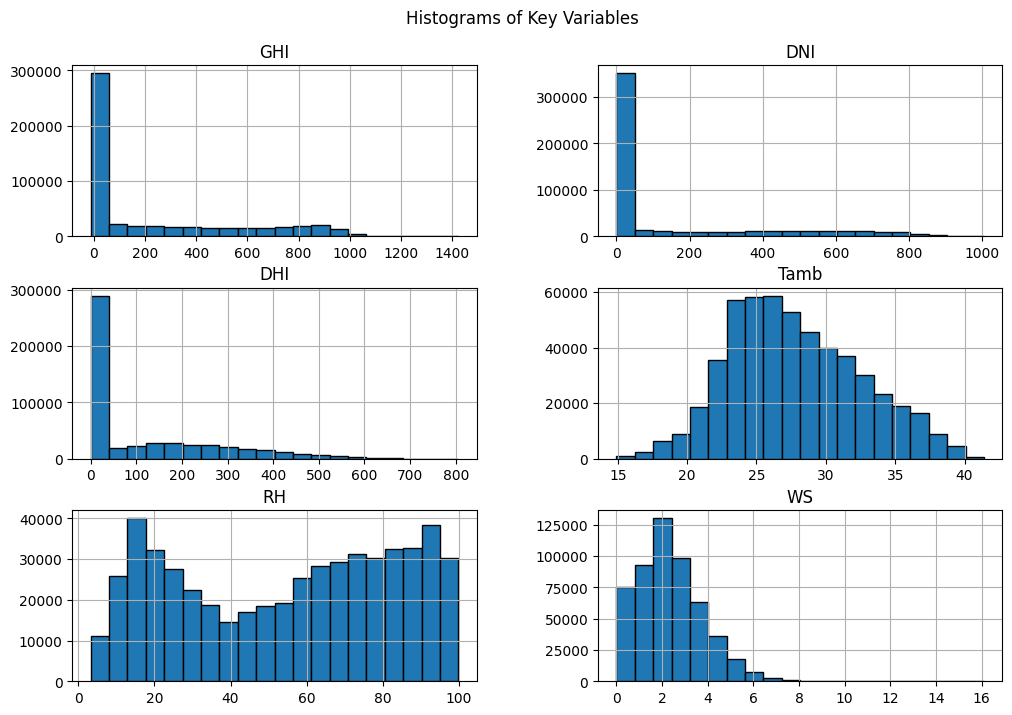

In [31]:
# Distribution Analysis: Histograms for key variables
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']
data[columns_to_plot].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Key Variables", y=0.95)
plt.show()

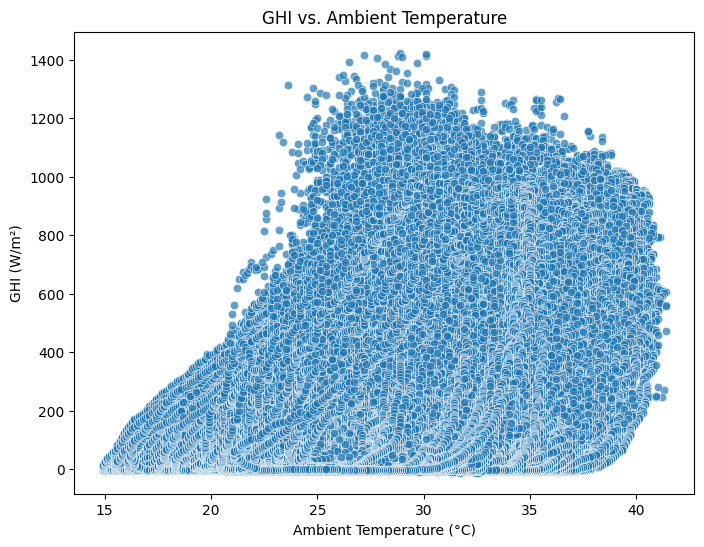

In [32]:
# Scatter Plot: GHI vs Tamb
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tamb', y='GHI', data=data, alpha=0.7)
plt.title("GHI vs. Ambient Temperature")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.show()

In [33]:
# Z-Score Analysis: Outlier Detection
data_zscore = data.select_dtypes(include=np.number)
z_scores = np.abs(zscore(data_zscore))
outliers = (z_scores > 3).sum(axis=0)
print("\nNumber of Outliers per Column (Z-Score > 3):")
print(outliers)


Number of Outliers per Column (Z-Score > 3):
GHI               305
DNI              1062
DHI              3415
ModA              137
ModB              206
Tamb                0
RH                  0
WS               3510
WSgust           3915
WSstdev          5753
WD                  0
WDstdev          3362
BP               1019
Cleaning          281
Precipitation    3338
TModA             153
TModB             609
Comments            0
Month               0
dtype: int64


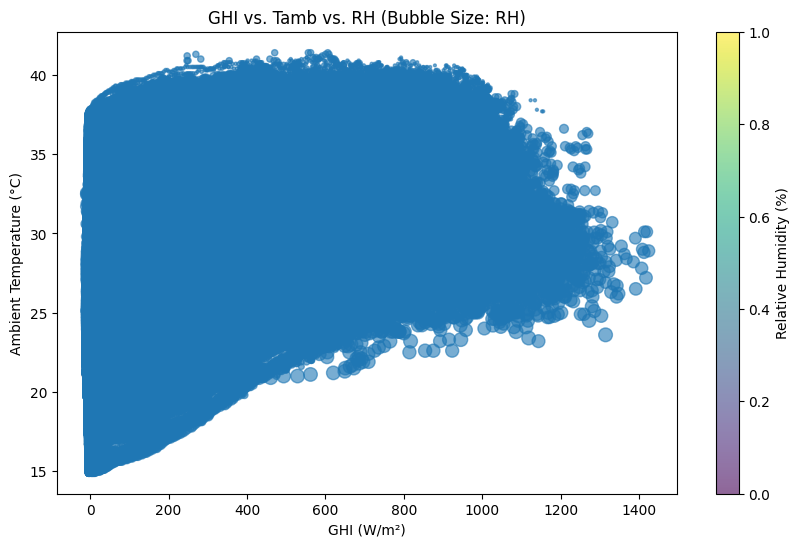

In [34]:
# Bubble Chart: GHI vs Tamb vs RH
plt.figure(figsize=(10, 6))
plt.scatter(data['GHI'], data['Tamb'], s=data['RH'], alpha=0.6)
plt.title("GHI vs. Tamb vs. RH (Bubble Size: RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.colorbar(label="Relative Humidity (%)")
plt.show()


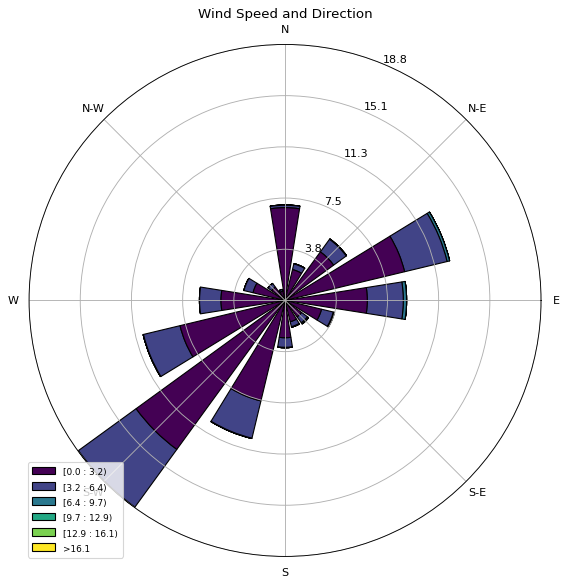

In [35]:
# Wind Analysis: Wind Rose Plot
!pip install windrose
try:
    from windrose import WindroseAxes
    ax = WindroseAxes.from_ax()
    ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='black')
    ax.set_legend()
    plt.title("Wind Speed and Direction")
    plt.show()
except ImportError:
    print("Windrose library not installed. Install it using: pip install windrose")


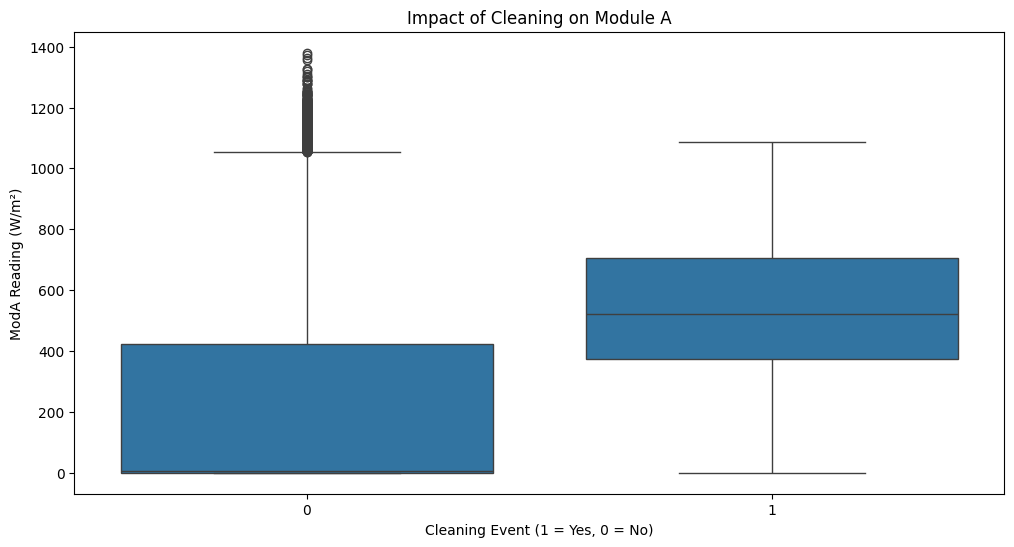

In [36]:
# Impact of Cleaning on ModA and ModB
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cleaning', y='ModA', data=data)
plt.title("Impact of Cleaning on Module A")
plt.xlabel("Cleaning Event (1 = Yes, 0 = No)")
plt.ylabel("ModA Reading (W/m²)")
plt.show()

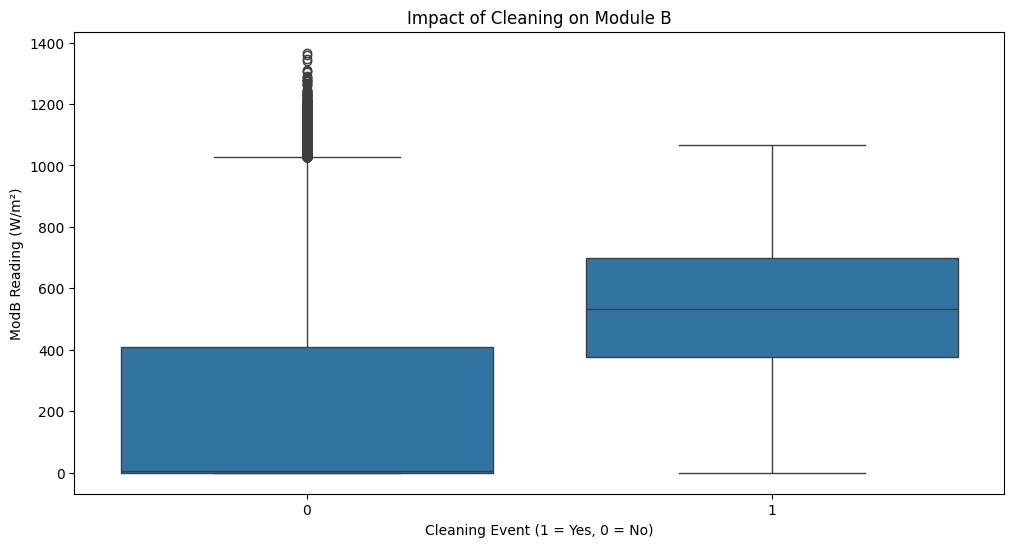

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cleaning', y='ModB', data=data)
plt.title("Impact of Cleaning on Module B")
plt.xlabel("Cleaning Event (1 = Yes, 0 = No)")
plt.ylabel("ModB Reading (W/m²)")
plt.show()